In [18]:
# Import the libraries needed
from bs4 import BeautifulSoup
from collections import Counter
import itertools
import matplotlib as plt
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import random
import spacy
from spacy import displacy
from spacy.lang.en import English
from urllib.request import urlopen
import re
import requests
import seaborn as sns

In [19]:
nlp = spacy.load("en_core_web_sm")

## Importing Dataset

In [20]:
reviews = pd.read_json('data/reviewSamples20.json', encoding='ISO-8859-1', lines=True)

## 3.2 Dataset Analysis

### Tokenisation and Stemming

In [21]:
# get reviews for a random business 
random_business = reviews.sample()
random_business_id = random_business.iloc[0]['business_id']
small_business_dataset = reviews.loc[reviews['business_id'] == random_business_id]
small_business_dataset.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
11,dS5ERxmIP-CQ_ZV_q_xc0A,SYRRQJoa5gQ8Duev4uSWag,8KmqWgL0UEdxJFwTZ_YZvQ,5,0,0,0,These burgers are phenomenal! The Galley Boy j...,2012-12-04 03:30:31


In [35]:
small_business_dataset_reviews = list(small_business_dataset['text'])
small_business_dataset_reviews

['These burgers are phenomenal! The Galley Boy just melts in your mouth, and paired with the potato teasers and a milkshake it is like heaven on Earth.']

In [23]:
# convert the reviews into a concatenated string 
b1_review = ''.join(small_business_dataset_reviews)
clean_review = re.sub(r"[^A-Za-z0-9\s]+", "", b1_review)
b1_review = nlp(clean_review)

In [24]:
# removed punctuation and get the top 10 most common words (including stopwords)
b1_review_words = [token.text for token in b1_review if token.is_alpha == True] 
b1_word_freq = Counter(b1_review_words)
common_words = b1_word_freq.most_common(10)
print(common_words)

[('and', 2), ('These', 1), ('burgers', 1), ('are', 1), ('phenomenal', 1), ('The', 1), ('Galley', 1), ('Boy', 1), ('just', 1), ('melts', 1)]


In [25]:
# removed punctuation and get the top 10 most common words (excluding stopwords)
b1_review_words = [token.text for token in b1_review if token.is_stop != True and token.is_alpha == True] 
b1_word_freq = Counter(b1_review_words)
common_words = b1_word_freq.most_common(10)
print(common_words)

[('burgers', 1), ('phenomenal', 1), ('Galley', 1), ('Boy', 1), ('melts', 1), ('mouth', 1), ('paired', 1), ('potato', 1), ('teasers', 1), ('milkshake', 1)]


Text(0.5, 1.0, 'Distribution of Word Counts Before Stemming (log scale)')

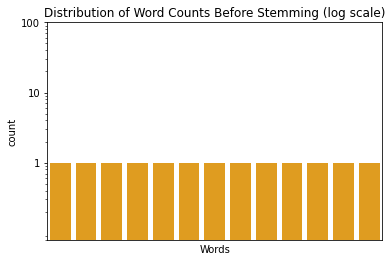

In [26]:
# log graph before stemming

df = pd.DataFrame(b1_word_freq.items(), columns=['word', 'count'])
df = df.sort_values(by=['count'], ascending=False)

ticks = [1, 10, 100]
figure = sns.barplot(data=df, x='word', y='count', color='orange')
figure.set_yscale("log") 
figure.set_yticks(ticks)
figure.set_yticklabels(ticks)
figure.set_xticks([])
figure.set_xticklabels([])
figure.set_xlabel('Words')
figure.set_title("Distribution of Word Counts Before Stemming (log scale)")

In [27]:
# now we do some stemming after removing the stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

porter_st = PorterStemmer()
lancaster_st = LancasterStemmer()
snow_st = SnowballStemmer("english")

In [28]:
# Using Porter Stemmer
porter_stemmed_words = [porter_st.stem(word) for word in b1_review_words]
porter_freq = Counter(porter_stemmed_words)
porter_common = porter_freq.most_common(10)
print(porter_common)

[('burger', 1), ('phenomen', 1), ('galley', 1), ('boy', 1), ('melt', 1), ('mouth', 1), ('pair', 1), ('potato', 1), ('teaser', 1), ('milkshak', 1)]


Text(0.5, 1.0, 'Distribution of Word Counts After Stemming (log scale)')

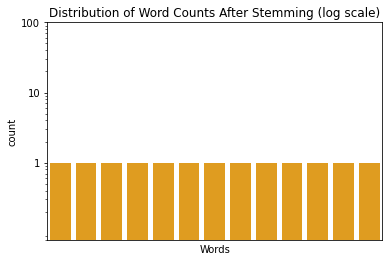

In [29]:
# log graph after stemming (porter stemmer)

df = pd.DataFrame(porter_freq.items(), columns=['word', 'count'])
df = df.sort_values(by=['count'], ascending=False)

ticks = [1, 10, 100]
figure = sns.barplot(data=df, x='word', y='count', color='orange')
figure.set_yscale("log") 
figure.set_yticks(ticks)
figure.set_yticklabels(ticks)
figure.set_xticks([])
figure.set_xticklabels([])
figure.set_xlabel('Words')
figure.set_title("Distribution of Word Counts After Stemming (log scale)")

In [30]:
# Using Lancaster Stemmer
lancaster_stemmed_words = [lancaster_st.stem(word) for word in b1_review_words]
lancaster_freq = Counter(lancaster_stemmed_words)
lancaster_common = lancaster_freq.most_common(10)
print(lancaster_common)

[('burg', 1), ('phenom', 1), ('galley', 1), ('boy', 1), ('melt', 1), ('mou', 1), ('pair', 1), ('potato', 1), ('teas', 1), ('milkshak', 1)]


In [31]:
# Using Snowball Stemmer
snow_stemmed_words = [snow_st.stem(word) for word in b1_review_words]
snow_freq = Counter(snow_stemmed_words)
snow_common = snow_freq.most_common(10)
print(snow_common)

[('burger', 1), ('phenomen', 1), ('galley', 1), ('boy', 1), ('melt', 1), ('mouth', 1), ('pair', 1), ('potato', 1), ('teaser', 1), ('milkshak', 1)]


### POS Tagging

In [32]:
random_sentences = reviews.sample(5, random_state=42)
random_sentences = list(random_sentences['text'])

In [33]:
random_sentences[0]

'I\'ll be the first to admit that I was not excited about going to La Tavolta. Being a food snob, when a group of friends suggested we go for dinner I looked online at the menu and to me there was nothing special and it seemed overpriced.  Im also not big on ordering pasta when I go out. Alas, I was outnumbered. Thank goodness! I ordered the sea bass special. It was to die for. Cooked perfectly, seasoned perfectly, perfect portion. I can not say enough good things about this dish. When the server asked how it was he seemed very proud of the dish and said, " doesn\'t she (the chef) do an incredible job?" She does. \n\nMy hubby got the crab tortellini and also loved his. I heard "mmmm this is so good" from all around the table. Our waiter was super nice and even gave us free desserts because we were some of the last people in the restaurant. Service was very slow and the place was PACKED but we had our jugs of wine and a large group with good conversation so it didn\'t seem to bother any

In [36]:
nltk_tagged = []
for sentence in random_sentences:
    nltk_tagged.append((nltk.pos_tag(word_tokenize(sentence))))
nltk_tagged

[[('I', 'PRP'),
  ("'ll", 'MD'),
  ('be', 'VB'),
  ('the', 'DT'),
  ('first', 'JJ'),
  ('to', 'TO'),
  ('admit', 'VB'),
  ('that', 'IN'),
  ('I', 'PRP'),
  ('was', 'VBD'),
  ('not', 'RB'),
  ('excited', 'VBN'),
  ('about', 'IN'),
  ('going', 'VBG'),
  ('to', 'TO'),
  ('La', 'NNP'),
  ('Tavolta', 'NNP'),
  ('.', '.'),
  ('Being', 'VBG'),
  ('a', 'DT'),
  ('food', 'NN'),
  ('snob', 'NN'),
  (',', ','),
  ('when', 'WRB'),
  ('a', 'DT'),
  ('group', 'NN'),
  ('of', 'IN'),
  ('friends', 'NNS'),
  ('suggested', 'VBN'),
  ('we', 'PRP'),
  ('go', 'VBP'),
  ('for', 'IN'),
  ('dinner', 'NN'),
  ('I', 'PRP'),
  ('looked', 'VBD'),
  ('online', 'NN'),
  ('at', 'IN'),
  ('the', 'DT'),
  ('menu', 'NN'),
  ('and', 'CC'),
  ('to', 'TO'),
  ('me', 'PRP'),
  ('there', 'EX'),
  ('was', 'VBD'),
  ('nothing', 'NN'),
  ('special', 'JJ'),
  ('and', 'CC'),
  ('it', 'PRP'),
  ('seemed', 'VBD'),
  ('overpriced', 'JJ'),
  ('.', '.'),
  ('Im', 'NNP'),
  ('also', 'RB'),
  ('not', 'RB'),
  ('big', 'JJ'),
  ('on', 'I

In [37]:
nlp = spacy.load("en_core_web_sm")
spacy_tagged = []
for sentence in random_sentences:
    spacy_tagged.append(nlp(sentence))
for tagged in spacy_tagged:
    for token in tagged:
        print(f'{token.text:{8}} {token.pos_:{6}}')

I        PRON  
'll      AUX   
be       VERB  
the      DET   
first    ADJ   
to       PART  
admit    VERB  
that     SCONJ 
I        PRON  
was      AUX   
not      PART  
excited  ADJ   
about    ADP   
going    VERB  
to       ADP   
La       PROPN 
Tavolta  PROPN 
.        PUNCT 
Being    VERB  
a        DET   
food     NOUN  
snob     NOUN  
,        PUNCT 
when     ADV   
a        DET   
group    NOUN  
of       ADP   
friends  NOUN  
suggested VERB  
we       PRON  
go       VERB  
for      ADP   
dinner   NOUN  
I        PRON  
looked   VERB  
online   ADV   
at       ADP   
the      DET   
menu     NOUN  
and      CCONJ 
to       ADP   
me       PRON  
there    PRON  
was      VERB  
nothing  PRON  
special  ADJ   
and      CCONJ 
it       PRON  
seemed   VERB  
overpriced VERB  
.        PUNCT 
         SPACE 
I        PRON  
m        VERB  
also     ADV   
not      PART  
big      ADJ   
on       ADP   
ordering VERB  
pasta    NOUN  
when     ADV   
I        PRON  
go   